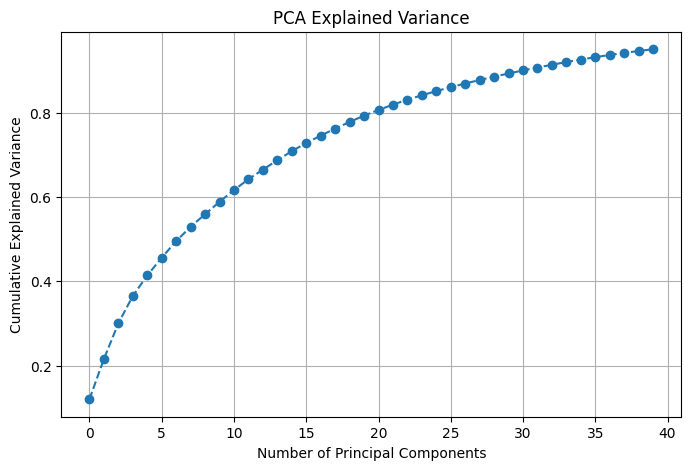

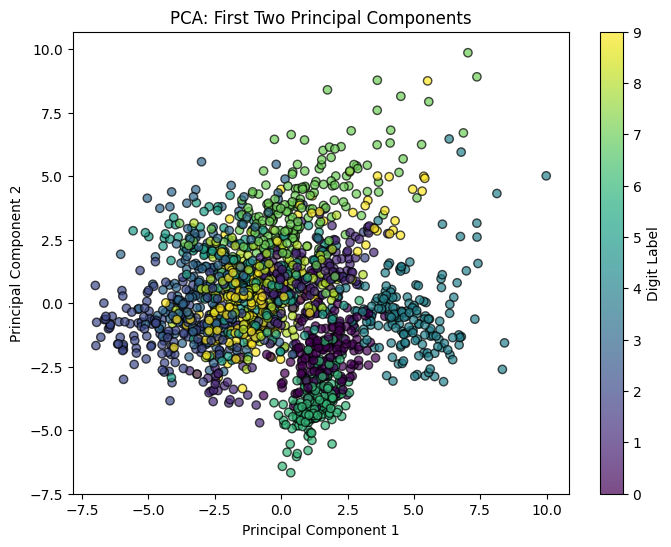

Accuracy without PCA: 0.9759
Accuracy with PCA: 0.9648


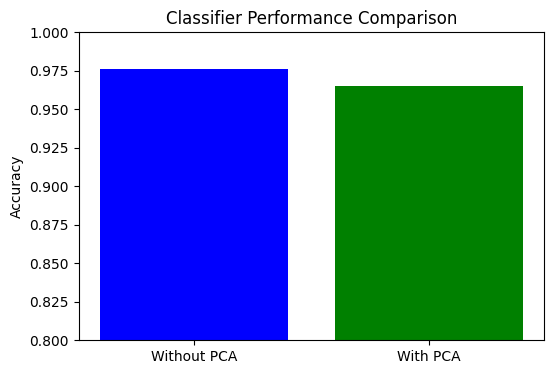

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 95% variance retention
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Visualize explained variance

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Visualizing the first two principal components

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Digit Label')
plt.show()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train classifier on original data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

# Train classifier on reduced data
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print(f'Accuracy without PCA: {accuracy_original:.4f}')
print(f'Accuracy with PCA: {accuracy_pca:.4f}')

# Bar plot comparison of classifier accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Without PCA', 'With PCA'], [accuracy_original, accuracy_pca], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.ylim(0.8, 1.0)
plt.show()
